# NeuralNetwork_Convolutional and CIFAR-10

Here is code that we started in October 22nd lecture.

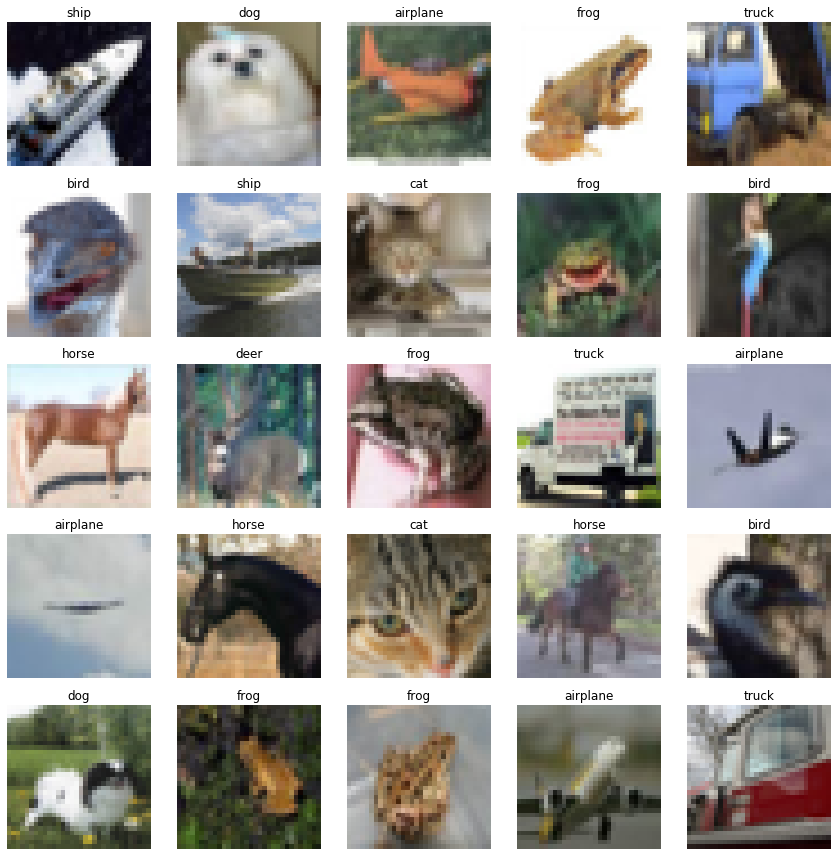

In [1]:
import pickle
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

data = []
for file in glob.glob('cifar-10/data_batch*'):
    with open(file, 'rb') as fo:
        data.append(pickle.load(fo, encoding='bytes'))

with open('cifar-10/batches.meta', 'rb') as f:
    class_names = pickle.load(f, encoding='bytes')
class_names = class_names[b'label_names']

images = data[0][b'data']
labels = data[0][b'labels']

images = images.reshape(-1, 3, 32, 32)

images = np.moveaxis(images, 1, 3)

plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i, :, :, :].astype(np.int32), interpolation='nearest')
    plt.axis('off')
    unicode = class_names[labels[i]].decode('utf-8')
    plt.title(unicode) 

plt.tight_layout()

In [2]:
from A4mysolution import *

Let's use the first batch for training and the second batch for testing.  Each will have 10,000 images.

In [3]:
Xtrain = data[0][b'data'].reshape(-1, 3, 32, 32)
Ttrain = np.array(data[0][b'labels'])

Xtest = data[1][b'data'].reshape(-1, 3, 32, 32)
Ttest = np.array(data[1][b'labels'])

In [4]:
nnet = NeuralNetwork_Convolutional(n_channels_in_image=Xtrain.shape[1],
                                   image_size=Xtrain.shape[2],
                                   n_units_in_conv_layers=[20, 20],
                                   kernels_size_and_stride=[[5, 2], [5, 3]], # , [4, 1]],
                                   n_units_in_fc_hidden_layers=[10], # 10, 10],
                                   classes=range(10),
                                   use_gpu=True)
nnet.train(Xtrain, Ttrain, 50, learning_rate=0.01)


GPU is not available. Running on CPU.

Epoch 5 error 2.07084
Epoch 10 error 1.96124
Epoch 15 error 1.89195
Epoch 20 error 1.82609
Epoch 25 error 1.77019
Epoch 30 error 1.71548
Epoch 35 error 1.65701
Epoch 40 error 1.62793
Epoch 45 error 1.54961
Epoch 50 error 1.49217


In [5]:
print(f'Training took {nnet.training_time:.3f} seconds.')

Training took 30.590 seconds.


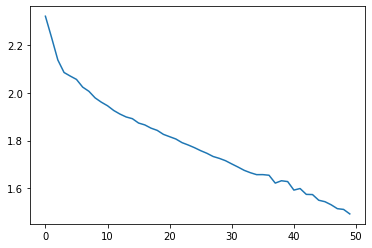

In [6]:
plt.plot(nnet.get_error_trace())

In [9]:
for name, X, T in (('Training', Xtrain, Ttrain),
                   ('Testing', Xtest, Ttest)):
    Y, _ = nnet.use(X)
    T = T.reshape((-1, 1))
    n_correct = np.sum(T == Y)
    n = T.shape[0]
    print(f'{name:10}: {n_correct:5d} out of {n:5d} ({n_correct / n * 100:.1f}%) samples correctly classified.')

Training  :  4823 out of 10000 (48.2%) samples correctly classified.
Testing   :  4089 out of 10000 (40.9%) samples correctly classified.


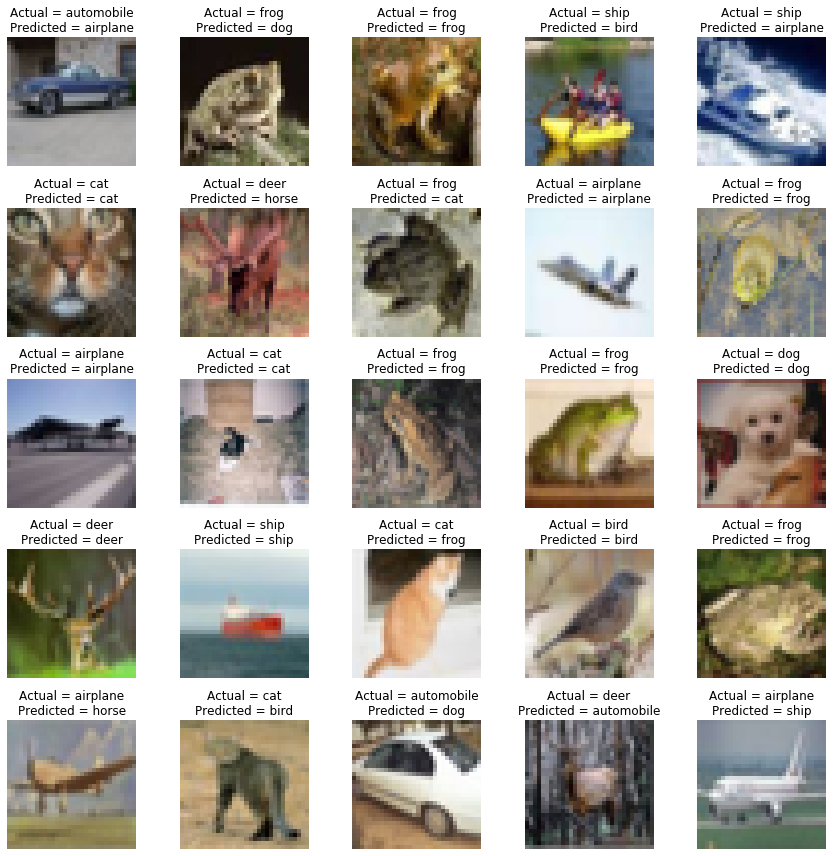

In [10]:
plt.figure(figsize=(12, 12))
Y, _ = nnet.use(Xtest)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(np.moveaxis(Xtest[i,...], 0, 2).astype(np.int32),
               interpolation='nearest')
    plt.axis('off')
    target = class_names[Ttest[i]].decode('utf-8')
    pred = class_names[Y[i,0]].decode('utf-8')
    plt.title(f'Actual = {target}\nPredicted = {pred}')
plt.tight_layout()

In [ ]:
nnet = NeuralNetwork_Convolutional(
    n_channels_in_image=Xtrain.shape[1],
    image_size=Xtrain.shape[2],
    n_units_in_conv_layers=[10, 10],
    kernels_size_and_stride=[[5, 2], [5, 3]], # , [4, 1]],
    n_units_in_fc_hidden_layers=[50, 50],
    classes=range(10),
    use_gpu=True)

nnet.train(Xtrain, Ttrain, 200, learning_rate=0.01) 

for name, X, T in (('Training', Xtrain, Ttrain),
                   ('Testing', Xtest, Ttest)):
    Y, _ = nnet.use(X)
    T = T.reshape((-1, 1))
    n_correct = np.sum(T == Y)
    n = T.shape[0]
    print(f'{name:10}: {n_correct:5d} out of {n:5d} ({n_correct / n * 100:.1f}%) samples correctly classified.')


GPU is not available. Running on CPU.

Epoch 20 error 1.73912
Epoch 40 error 1.47523
